In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import dataiku
from dataiku import pandasutils as pdu
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Example: load a DSS dataset as a Pandas dataframe
mydataset = dataiku.Dataset("full_data")
df = mydataset.get_dataframe()

In [7]:
df.head()

,id,emp_title,emp_length,home_ownership,annual_inc,verification_status,addr_state,mort_acc,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,acc_now_delinq,all_util,inq_last_12m,chargeoff_within_12_mths,num_accts_ever_120_pd,loan_amnt,term,int_rate,purpose,title,Default
0,1069759,Internal revenue Service,< 1 year,RENT,28000.0,Not Verified,MO,NaN,20.31,0,Sep-2007,665,669,1,NaN,11,0,0,NaN,NaN,0,NaN,1000,36 months,16.29%,debt_consolidation,Debt Consolidation Loan,0
1,1049528,NCS Technologies,4 years,MORTGAGE,47800.0,Verified,VA,NaN,10.04,0,Nov-2001,740,744,0,NaN,15,0,0,NaN,NaN,0,NaN,20000,60 months,11.71%,debt_consolidation,Bill Consolidation,0
2,1063270,Dennis Alleman DMD,5 years,MORTGAGE,23000.0,Not Verified,OR,NaN,18.89,0,Feb-2005,730,734,1,NaN,9,0,0,NaN,NaN,0,NaN,10625,36 months,7.51%,medical,Bills,0
3,1059412,Marshall Realty,5 years,MORTGAGE,70000.0,Not Verified,NY,NaN,16.78,0,Aug-1994,740,744,0,NaN,9,0,0,NaN,NaN,0,NaN,10000,36 months,6.62%,credit_card,credit card payoff,0
4,1065304,Shaws,10+ years,RENT,55000.0,Not Verified,RI,NaN,13.00,0,Mar-1998,705,709,0,NaN,10,0,0,NaN,NaN,0,NaN,12000,36 months,9.91%,debt_consolidation,Zero Balance Project,1


In [8]:
# Get the column names
numerical_columns = list(df.select_dtypes(include=[np.number]).columns)
categorical_columns = list(df.select_dtypes(include=[object]).columns)

In [9]:
numerical_columns

['id',
 'annual_inc',
 'mort_acc',
 'dti',
 'delinq_2yrs',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'open_acc',
 'pub_rec',
 'acc_now_delinq',
 'all_util',
 'inq_last_12m',
 'chargeoff_within_12_mths',
 'num_accts_ever_120_pd',
 'loan_amnt',
 'Default']

In [10]:
corr_matrix_vars = numerical_columns[1:]

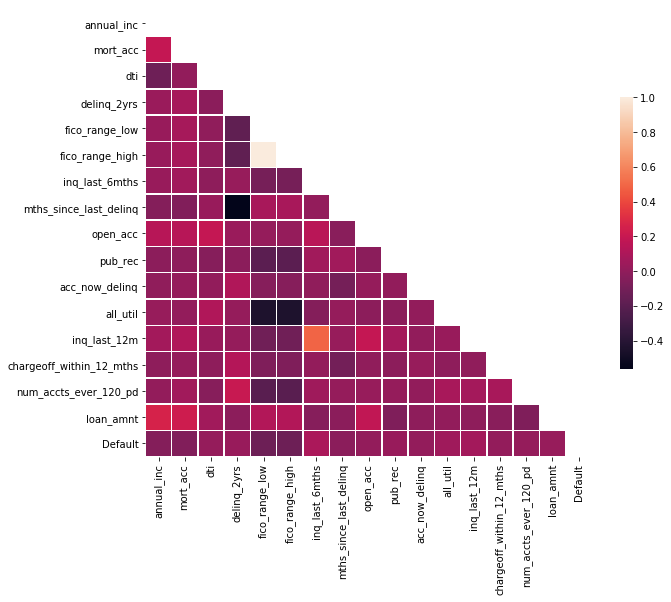

In [12]:
# Only select the requested columns
df_corr_matrix = df[corr_matrix_vars]

# This computes the Pearson coefficient for all couples
corr = df_corr_matrix.corr().fillna(0)

# Start drawing

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
size = max(10, len(corr.columns)/2.)
f, ax = plt.subplots(figsize=(size, size))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, square=True, linewidths=.5, cbar_kws={"shrink": 0.5}, ax=ax);